In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# FFNN

\begin{eqnarray*}
\frac{\partial}{\partial x} x + y &=& 1 \\
\frac{\partial}{\partial y} x + y &=& 1 \\
\frac{\partial}{\partial x} x * y &=& y \\
\frac{\partial}{\partial y} x * y &=& x
\end{eqnarray*}

\begin{eqnarray*}
Z = X + Y \\
(\frac{\partial}{\partial X} L(Z))_{ij} &=&
\Sigma_{kl} \frac{\partial}{\partial z_{kl}} L(Z) \frac{\partial}{\partial x_{ij}} z_{kl} =
\Sigma_{kl} \frac{\partial}{\partial z_{kl}} L(Z) \frac{\partial}{\partial x_{ij}} (x_{kl} + y_{kl}) =
\frac{\partial}{\partial z_{ij}} L(Z) =
(\frac{\partial}{\partial Z} L(Z))_{ij} \\
Z = X Y \\
(\frac{\partial}{\partial X} L(Z))_{ij} &=&
\Sigma_{kl} \frac{\partial}{\partial z_{kl}} L(Z) \frac{\partial}{\partial x_{ij}} z_{kl} =
\Sigma_{kl} \frac{\partial}{\partial z_{kl}} L(Z) \frac{\partial}{\partial x_{ij}} (\Sigma_m x_{km} y_{ml}) =
\Sigma_{l} \frac{\partial}{\partial z_{il}} L(Z) y_{jl} =
(\frac{\partial}{\partial Z} L(Z) Y^T)_{ij} \\
(\frac{\partial}{\partial Y} L(Z))_{ij} &=&
\Sigma_{kl} \frac{\partial}{\partial z_{kl}} L(Z) \frac{\partial}{\partial y_{ij}} z_{kl} =
\Sigma_{kl} \frac{\partial}{\partial z_{kl}} L(Z) \frac{\partial}{\partial y_{ij}} (\Sigma_m x_{km} y_{ml}) =
\Sigma_{k} \frac{\partial}{\partial z_{kj}} L(Z) x_{ki} =
(X^T \frac{\partial}{\partial Z} L(Z))_{ij}
\end{eqnarray*}

In [2]:
np.random.seed(0)
x = np.random.randn(10, 1)
y = np.where(x > 0, 1., 0.)
print(x)

[[ 1.76405235]
 [ 0.40015721]
 [ 0.97873798]
 [ 2.2408932 ]
 [ 1.86755799]
 [-0.97727788]
 [ 0.95008842]
 [-0.15135721]
 [-0.10321885]
 [ 0.4105985 ]]


In [3]:
np.random.seed(10)
loss = Loss("cross_entropy_error")
a = Input(input_shape=1)
b = Dense(a, input_shape=1, output_shape=2, learning_rate=0.1, verbose=False)
c = Sigmoid(b, shape=2)
d = Dense(c, input_shape=2, output_shape=1, learning_rate=0.1, verbose=False)
e = Sigmoid(d, shape=1)
f = Output(e, loss_forward=loss.forward, loss_backward=loss.backward, output_shape=1, verbose=False)
for _ in range(1000):
    result = f.forward(x, y)
    f.backward()
    f.update()
print(f.predict(x))
np.mean(cross_entropy_error(y, f.predict(x)))

NameError: name 'Loss' is not defined

\begin{eqnarray*}
\frac{d L}{d W}
&=& \frac{\partial L}{\partial h_n} \frac{d h_n}{d W} \\
&=& \frac{\partial L}{\partial h_n} (\frac{\partial h_n}{\partial W} + \frac{\partial h_n}{\partial h_{n-1}} \frac{d h_{n-1}}{d W})
\end{eqnarray*}

\begin{eqnarray*}
h = W x \\
\frac{\partial L}{\partial W} = \frac{\partial L}{\partial h} \frac{\partial h}{\partial W} \\
\frac{\partial L}{\partial h} = dout \\
\frac{\partial h}{\partial W} = 
\left(
\begin{array}{cc}
\frac{\partial h}{\partial w_{11}} & \frac{\partial h}{\partial w_{1n}} \\
\frac{\partial h}{\partial w_{n1}} & \frac{\partial h}{\partial w_{nn}} \\
\end{array}
\right) =
\left(
\begin{array}{cc}
\left( \begin{array}{c} x_1 \\ 0 \\ \end{array} \right) & \left( \begin{array}{c} x_n \\ 0 \\ \end{array} \right) \\
\left( \begin{array}{c} 0 \\ x_1 \\ \end{array} \right) & \left( \begin{array}{c} 0 \\ x_n \\ \end{array} \right) \\
\end{array}
\right) \\
\frac{\partial L}{\partial W} = dout_1 \left( \begin{array}{c} x_1 \\ 0 \\ \end{array} \right) & \left( \begin{array}{c} x_n \\ 0 \\ \end{array} \right) + dout_n \left( \begin{array}{c} 0 \\ x_1 \\ \end{array} \right) & \left( \begin{array}{c} 0 \\ x_n \\ \end{array} \right)
= \left( \begin{array}{c} dout_1 x^T \\ dout_n x^T \\ \end{array} \right)
= dout x^T 
\end{eqnarray*}

In [20]:
import numpy as np
import pandas as pd

def sigmoid(x):
    return 1 / (1 + np.exp(- x))

def mean_squared_error(answer, predict):
    return (answer - predict)**2 / 2

def cross_entropy_error(answer, predict):
    return - (answer * np.log2(predict) + (1 - answer) * np.log2(1 - predict))

class Input:
    def __init__(self, input_shape, verbose=False):
        self.output_shape = input_shape
        self.output = None
        self.layer = None
        self.verbose = verbose
        if (self.verbose):
            print("init@", self)
    def forward(self, x):
        self.output = x
        if (self.verbose):
            print("forward@", self, " and return value is")
            print(self.output)
        return self.output
    def backward(self, dy):
        if (self.verbose):
            print("backward@", self, " and return value is")
            print(dy)
        return dy
    def update(self):
        pass
    
class Output:
    def __init__(self, layer, loss_forward, loss_backward, output_shape, verbose=False):
        self.input_shape = None
        self.output_shape = output_shape
        self.pred = None
        self.answer = None
        self.loss_forward = loss_forward
        self.loss_backward = loss_backward
        self.layer = layer
        self.verbose = verbose
        if (self.verbose):
            print("init@", self)
    def forward(self, x, t):
        self.pred = self.layer.forward(x)
        self.answer = t
        loss = self.loss_forward(self.answer, self.pred)
        if (self.verbose):
            print("forward@", self, " and predict is")
            print(self.pred)
            print("and loss is ", loss)
        return loss
    def backward(self):
        dy = self.loss_backward()
        if (self.verbose):
            print("backward@", self, " and return value is")
            print(dy)
        return self.layer.backward(dy)
    def update(self):
        self.layer.update()
    def predict(self, x):
        y = self.layer.forward(x)
        if (self.verbose):
            print("predict@", self, " and return value is")
            print(y)
        return y

# TODO: RNNに対応する
class Dense:
    def __init__(self, layer, input_shape, output_shape, learning_rate=0.01, sequential=False, verbose=False):
        self.input_shape = input_shape
        self.output_shape = output_shape
        self.layer = layer
        self.x = None
        self.W = None
        self.b = None
        self.dW = None
        self.db = None
        self.lr = learning_rate
        self.seq = sequential
        self.verbose = verbose
        if (self.verbose):
            print("init@", self)
    # NOTE: (batch_size, input_shape) -> (batch_size, output_shape)
    def forward(self, x):
        self.x = self.layer.forward(x)
        if (self.seq):
            batch_size, seq_length, _ = self.x.shape
            if (self.W is None and self.b is None):
                self.W = np.random.randn(seq_length, self.output_shape, self.input_shape) * 0.01
                self.b = np.random.randn(seq_length, self.output_shape) * 0.01
            y = np.array([
                np.dot(self.x[:, t, :], self.W[t, :, :].T) + np.tile(self.b[t, :], (batch_size,1))
                for t in range(seq_length)]).transpose((1,0,2))
        else:
            batch_size, _ = self.x.shape
            if (self.W is None and self.b is None):
                self.W = np.random.randn(self.output_shape, self.input_shape) * 0.01
                self.b = np.random.randn(1, self.output_shape) * 0.01
            y = np.dot(self.x, self.W.T) + np.repeat(self.b, batch_size, axis=0)
        if (self.verbose):
            print("forward@", self, " and return value is")
            print(y)
        return y
    # NOTE: (batch_size, output_shape) -> (batch_size, input_shape)
    def backward(self, dy):
        if (self.seq):
            # sum up loss
            _, seq_length, _ = dy.shape
            self.dW = np.array([np.dot(dy[:, t, :].T, self.x[:, t, :]) for t in range(seq_length)])
            self.db = np.sum(dy, axis=0)
            dx = np.array([np.dot(dy[:, t, :], self.W[t, :, :]) for t in range(seq_length)]).transpose((1,0,2))
        else:
            # sum up loss
            self.dW = np.dot(dy.T, self.x)
            self.db = np.sum(dy, axis=0, keepdims=True)
            dx = np.dot(dy, self.W)
        if (self.verbose):
            print("backward@", self, " and return value is")
            print(self.dW)
        return self.layer.backward(dx)
    def update(self):
        if (self.verbose):
            print("update@", self, " with")
            print("self.W")
            print(self.W)
            print("self.b")
            print(self.b)
        self.W -= self.lr * self.dW
        self.b -= self.lr * self.db
        if (self.verbose):
            print("self.W")
            print(self.W)
            print("self.b")
            print(self.b)
        self.layer.update()
    
# TODO: インターフェースを整える
class Relu:
    def __init__(self, layer, shape):
        self.input = None
        self.output = None
        self.layer = layer
    def forward(self, x):
        y = self.layer.forward(x)
        z = y.copy()
        z[z <= 0] = 0
        self.input = y
        self.output = z
        return z
    def backward(self, dx):
        dy = dx.copy()
        dy[self.input <= 0] = 0
        return self.layer.backward(dy)
        
class Sigmoid:
    def __init__(self, layer, shape):
        self.input = None
        self.output = None
        self.layer = layer
    def forward(self, x):
        self.input = self.layer.forward(x)
        self.output = 1 / (1 + np.exp(- self.input))
        return self.output
    def backward(self, dx):
        dy = dx * self.output * (1 - self.output)
        return self.layer.backward(dy)
    def update(self):
        self.layer.update()
    
class Loss:
    def __init__(self, method, sequential=False, verbose=False):
        self.method = method
        self.pred = None
        self.answer = None
        self.seq = sequential
        self.verbose = verbose
    def forward(self, y_ans, y_pred):
        self.pred = y_pred
        self.answer = y_ans
        if (self.seq):
            if (self.method == "mean_squared_error"):
                result = np.mean((y_ans - y_pred) ** 2 / 2.0, axis=1)
            elif (self.method == "cross_entropy_error"):
                result = - np.mean((y_ans * np.log2(y_pred) + (1.0 - y_ans) * np.log2(1.0 - y_pred)), axis=1)
            else:
                result = None
        else:
            if (self.method == "mean_squared_error"):
                result = np.mean((y_ans - y_pred) ** 2) / 2.0
            elif (self.method == "cross_entropy_error"):
                result = - np.mean(y_ans * np.log2(y_pred) + (1.0 - y_ans) * np.log2(1.0 - y_pred))
            else:
                result = None
        if (self.verbose):
            print("forward@", self, " and return value is ")
            print(result)
        return result
    def backward(self):
        if (self.seq):
            _, seq_length, _ = self.pred.shape
            if (self.method == "mean_squared_error"):
                result = (self.pred - self.answer) / seq_length
            elif (self.method == "cross_entropy_error"):
                result = - (self.pred - self.answer) / ((self.pred * (self.pred - 1.0)) * seq_length)
            else:
                result = None
        else:
            if (self.method == "mean_squared_error"):
                result = self.pred - self.answer
            elif (self.method == "cross_entropy_error"):
                result = - (self.pred - self.answer) / (self.pred * (self.pred - 1.0))
            else:
                result = None
        if (self.verbose):
            print("backward@", self, " and return value is")
            print(result)
        return result


In [21]:
# def identity(xs, n):
#     batch_size, *shape = xs.shape
#     result = np.zeros((batch_size, n, n, *shape))
#     for b in range(batch_size):
#         for i in range(n):
#             result[b, i, i] = xs[b]
#     return result

def identity(x, n):
    y = np.zeros((n, n, *x.shape))
    for i in range(n):
        y[i, i, :] = x
    return y

def clipping(dxs, threshold):
    norm = 0.0
    for dx in dxs:
        norm += np.sum(dx**2)
    norm = np.sqrt(norm)
    rate = threshold / norm if (norm >= threshold) else 1.0
    dys = []
    for dx in dxs:
        dys.append(dx * rate)
    return dys

# identity(np.array([[1],[2]]), 3)

In [22]:
# TODO: 長い系列データはtruncateして学習するようにする
# TODO: パディングを実装する
# NOTE: そもそも時系列の部分はDenseのバッチ処理を行っているのでそのままバッチ処理して切れば良さそう
# TODO: hの初期値を与えられるようにする
class Recurrent():
    def __init__(self, layer, input_shape, output_shape, learning_rate=0.001, clipping=None, verbose=False):
        self.input_shape = input_shape
        self.output_shape = output_shape
        self.x = None
        self.h = None
        self.W_x = np.random.randn(output_shape, input_shape) * 0.01
        self.W_h = np.random.randn(output_shape, output_shape) * 0.01
        self.b = np.random.randn(output_shape) * 0.01
        self.dx = None
        self.dh = None
        self.dW_x = np.empty((output_shape, input_shape))
        self.dW_h = np.empty((output_shape, output_shape))
        self.db = np.empty(output_shape)
        self.lr = learning_rate
        self.layer = layer
        self.clipping = clipping
        self.verbose = verbose
        if (self.verbose):
            print("init@", self)
            
    def forward(self, x):
        self.x = self.layer.forward(x)
        batch_size, seq_length, _ = self.x.shape
        self.h = np.empty((batch_size, seq_length, self.output_shape))
        self.h[:, 0, :] = np.dot(self.layer.forward(self.x[:, 0, :]), self.W_x.T) + np.tile(self.b, (batch_size,1))
        for t in range(1, seq_length):
            self.h[:, t, :] = np.dot(self.layer.forward(self.x[:, t, :]), self.W_x.T) + np.dot(self.h[:, t-1, :], self.W_h.T) + np.tile(self.b, (batch_size,1))
        if (self.verbose):
            print("forward@", self, " and return value is")
            print(self.h)
        return self.h
    
    def backward(self, dy):
        batch_size, seq_length, _ = dy.shape
        self.dx = np.empty((batch_size, seq_length, self.input_shape))
        self.dh = np.empty((batch_size, seq_length, self.output_shape))
        # dx, dh
        self.dx[:, -1, :] = np.dot(dy[:, -1, :], self.W_x)
        self.dh[:, -1, :] = np.dot(dy[:, -1, :], self.W_h)
        for t in reversed(range(seq_length-1)):
            self.dx[:, t, :] = np.dot(dy[:, t, :] + self.dh[:, t+1, :], self.W_x)
            self.dh[:, t, :] = np.dot(dy[:, t, :] + self.dh[:, t+1, :], self.W_h)
        # dW_x, dW_h, db
        # NOTE: 変数のdW_xは\frac{\partial h}{\partial W}であることに注意する(名前を変えよう)
        dW_x = np.array([identity(self.x[n, 0, :], self.output_shape) for n in range(batch_size)])
        dW_h = np.array([identity(self.h[n, 0, :], self.output_shape) for n in range(batch_size)])
        db = np.array([np.eye(self.output_shape) for n in range(batch_size)])
        for t in range(1, seq_length):
            dW_x = np.array([identity(self.x[n, t, :], self.output_shape) + np.dot(self.W_h, dW_x[n, ...]) for n in range(batch_size)])
            dW_h = np.array([identity(self.h[n, t, :], self.output_shape) + np.dot(self.W_h, dW_h[n, ...]) for n in range(batch_size)])
            db = np.array([np.eye(self.output_shape) + np.dot(self.W_h, db[n, ...]) for n in range(batch_size)])
        self.dW_x = np.sum([np.dot(self.dh[n, -1, :], dW_x[n, ...]) for n in range(batch_size)], axis=0)
        self.dW_h = np.sum([np.dot(self.dh[n, -1, :], dW_h[n, ...]) for n in range(batch_size)], axis=0)
        self.db = np.sum([np.dot(self.dh[n, -1, :], db[n, ...]) for n in range(batch_size)], axis=0)
        if (self.verbose):
            print("bakcward@", self, " and return value is ")
            print(np.sum(self.dW_x**2))
        return self.layer.backward(self.dx)
    
    def update(self):
        if (self.clipping):
            self.dW_x, self.dW_h, self.b = clipping([self.dW_x, self.dW_h, self.b], self.clipping)  
        if (self.verbose):
            print("self.W_x")
            print(self.W_x)
            print("self.W_h")
            print(self.W_h)
            print("self.b")
            print(self.b)
        self.W_x -= self.lr * self.dW_x
        self.W_h -= self.lr * self.dW_h
        self.b -= self.lr * self.db
        if (self.verbose):
            print("self.W_x")
            print(self.W_x)
            print("self.W_h")
            print(self.W_h)
            print("self.b")
            print(self.b)
        self.layer.update()
        
            
    # DEBUG:
    def print_shape(self):
        print("xs: ", self.xs.shape)
        print("hs: ", self.hs.shape)
        print("W_x: ", self.W_x.shape)
        print("W_h: ", self.W_h.shape)
        print("b: ", self.b.shape)


In [7]:
# x = np.arange(24, dtype=np.float64).reshape(2, 3, 4)
# dx = np.arange(18, dtype=np.float64).reshape(2, 3, 3)
# y = np.arange(6, dtype=np.float64).reshape(2, 3, 1)
x = np.arange(100).reshape(20,5,1)[:, :-1]
y = np.arange(100).reshape(20,5,1)[:, 1:]
y.shape

(20, 4, 1)

In [97]:
class Seq2Seq:
    def __init__(self, encoder, decoder, verbose=False):
        self.encoder = encoder
        self.decoder = decoder
    def forward(self, x):
        pass
    def backward(self, dy):
        pass
    def update(self):
        self.encoder.update()
        self.decoder.update()
    
# TODO: ミニバッチ学習を実装する
class Network:
    def __init__(self, layer, verbose=False):
        self.layer = layer
        self.verbose = verbose
        self.loss = None
    def fit(self, x, y, batch_size=10, epoch=1, random_state=None):
        self.loss = np.zeros(epoch)
        if (self.verbose):
            print("fit@", self)
        
        data_size = x.shape[0]
        iteration = data_size // batch_size
        
        np.random.seed(random_state)
        for e in range(epoch):
            if (not (random_state is None)):
                index = np.random.permutation(data_size)
                x_data, y_data = x[index], y[index]
            else:
                x_data, y_data = x, y
            for i in range(iteration):
                x_batch, y_batch = x_data[batch_size*i:batch_size*(i+1)], y_data[batch_size*i:batch_size*(i+1)]
                loss = self.layer.forward(x_batch, y_batch)
                self.loss[e] += np.sum(loss)
                self.layer.backward()
                self.layer.update()
            if (self.verbose):
                print("%d\r" % e, end="")
        if (self.verbose):
            print(self.loss)
            plt.xlim([0, epoch])
            plt.ylim([0, 100])
            plt.plot(self.loss)
#                     print("loss(epoch %d, iter %d)" % (e, i))
#                     print(loss)

    def predict(self, x):
        y_pred = self.layer.predict(x)
        return y_pred

fit@ <__main__.Network object at 0x11bc5fe90>
[1.16812183e+04 6.12325550e+02 5.75878118e+02 3.93935511e+02
 2.39438704e+02 2.18867136e+02 1.58354157e+02 1.11833254e+02
 1.32144739e+02 1.27702029e+02 5.90967201e+01 6.41473448e+01
 4.58680207e+01 4.52000515e+01 4.04749080e+01 3.81073463e+01
 4.06353466e+01 3.54563977e+01 3.63294260e+01 2.90196100e+01
 3.03030622e+01 2.97966662e+01 3.03752326e+01 3.52672544e+01
 3.20316472e+01 2.90179981e+01 2.49762851e+01 2.72261102e+01
 2.75598862e+01 2.48130031e+01 2.44973524e+01 2.36294378e+01
 2.34200462e+01 2.49449909e+01 2.40172666e+01 2.46793194e+01
 2.31226703e+01 2.48411839e+01 2.21415145e+01 2.41849494e+01
 2.29003776e+01 2.21607839e+01 2.52627030e+01 2.18438959e+01
 2.27377491e+01 2.26953257e+01 2.07465795e+01 2.12625220e+01
 2.03324851e+01 2.17391447e+01 2.00052372e+01 2.25554953e+01
 1.99069316e+01 2.02612818e+01 2.04527386e+01 1.90589873e+01
 2.13737104e+01 1.91956847e+01 2.10513959e+01 2.03626660e+01
 2.02971349e+01 1.92388539e+01 1.826851

39.83694184362577

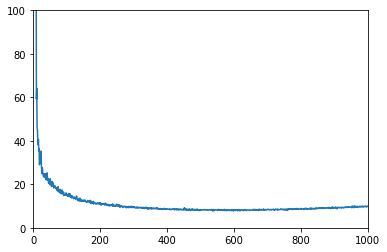

In [124]:
np.random.seed(0)
loss = Loss("mean_squared_error", sequential=True, verbose=False)
a = Input(input_shape=1, verbose=False)
b = Recurrent(a, input_shape=1, output_shape=1, learning_rate=0.01, clipping=10.0, verbose=False)
c = Recurrent(b, input_shape=1, output_shape=1, learning_rate=0.01, clipping=10.0, verbose=False)
d = Output(b, loss_forward=loss.forward, loss_backward=loss.backward, output_shape=1, verbose=False)

e = Network(d, verbose=True)
e.fit(x, y, batch_size=1, epoch=1000, random_state=0)
np.sum(mean_squared_error(e.predict(x), y))

fit@ <__main__.Network object at 0x1182d2090>
[1.91725419e+04 7.44176716e+00 1.96733109e+01 1.30550945e+01
 1.39840276e+01 1.72194636e+01 2.55401967e+01 1.30740759e+01
 4.57464351e+00 1.67322472e+01 1.37642656e+01 7.77225887e+00
 9.12876103e+00 1.16736765e+01 1.72696648e+01 7.40654524e+00
 1.26062563e+01 3.64549510e+00 1.30068802e+00 3.78349032e+00
 2.79670273e+00 5.41066413e+00 1.21175450e+01 7.69367062e+00
 4.14777142e+00 2.17591958e+00 6.14474847e+00 2.93755742e+01
 1.42537254e+00 1.24618161e+01 1.81114447e+00 3.53782645e+00
 8.41236990e+00 2.00095592e+00 1.87862423e+00 4.61894056e+00
 1.52784009e+01 3.33130370e+00 1.49391754e+00 3.59777626e+00
 5.03665814e+00 1.63641932e+01 2.78602553e+00 1.45273166e+00
 1.00633902e+00 1.14847065e+00 8.78403399e-01 4.11163580e+00
 1.18738717e+01 2.46639597e+00 1.02950374e+00 9.18014127e+00
 7.88455941e-01 1.86583576e+01 1.74716938e+01 5.62019361e+00
 2.48360927e+00 4.94378492e-01 1.46744159e+00 2.78570659e+00
 6.48840078e-01 1.03299637e+01 3.715180

1.4035436111928946e-12

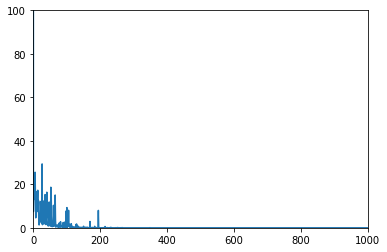

In [26]:
np.random.seed(0)
loss = Loss("mean_squared_error", sequential=True, verbose=False)
a = Input(input_shape=1, verbose=False)
b = Recurrent(a, input_shape=1, output_shape=3, learning_rate=0.001, clipping=10.0, verbose=False)
c = Dense(b, input_shape=3, output_shape=1, learning_rate=0.01, sequential=True, verbose=False)
d = Output(c, loss_forward=loss.forward, loss_backward=loss.backward, output_shape=1, verbose=False)
e = Network(d, verbose=True)
e.fit(x, y, batch_size=1, epoch=1000, random_state=0)

np.sum(mean_squared_error(e.predict(x), y))

In [55]:
# x = np.arange(24, dtype=np.float64).reshape(2, 3, 4)
dx = np.arange(18, dtype=np.float64).reshape(2, 3, 3)
# y = np.arange(6, dtype=np.float64).reshape(2, 3, 1)
x = np.arange(100).reshape(20,5,1)[:, :-1]
y = np.arange(100).reshape(20,5,1)[:, 1:]
y.shape

(20, 4, 1)

In [117]:
np.empty((1,2))

array([[6., 4.]])

In [129]:
a = np.arange(6).reshape((1,2,3))
a[(0,0,1)]

1

In [156]:
a = np.array([

[[[1,0],[0,2]],
 [[0,0],[0,0]]],

[[[0,0],[0,0]],
 [[3,0],[0,4]]]
 
])

b = np.array([
 [[1,0],[0,2]],
 [[3,0],[0,4]],
])

a[0,1,1,1]

0

In [ ]:
'''
diag([[1,2],[3,4]], shape=(2,2,2,2), axis=(2,3))
->
[

[[[1,0],[0,2]],
 [[0,0],[0,0]]],

[[[0,0],[0,0]],
 [[3,0],[0,4]]]
 
]
'''

In [ ]:
# TODO: 後回し
# 再帰的に処理すれば良い
# axis: (xを埋める軸たち......, バインドされる軸たち)
def diag(x, axis):
    n = x.ndim
    free = axis[:n]
    bound = axis[n:]
    
    dim = x.ndim
    y = np.empty(shape)
    for d in range(dim):
        if d in axis:
            

In [249]:
def fill(x, shape):
    m, n = x.shape[0], x.shape[1]
    y = np.empty((m, n, *shape))
    for i in range(m):
        for j in range(n):
            y[i][j].fill(x[i][j])
    return y

In [251]:
fill(np.array([[1,2]]), (3,3))

array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[2., 2., 2.],
         [2., 2., 2.],
         [2., 2., 2.]]]])

In [181]:
# 0番目の要素を追加する
def padding(x):
    batch_size, seq_length, input_shape = x.shape
    y = np.concatenate([np.zeros((batch_size, 1, input_shape)), x], axis=1)
    return y

a = np.arange(24).reshape((2,3,4))
padding(a)

array([[[ 0.,  0.,  0.,  0.],
        [ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]],

       [[ 0.,  0.,  0.,  0.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.],
        [20., 21., 22., 23.]]])

In [273]:
import numpy as np

# TODO: hの初期値を与えられるようにする
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def dsigmoid(x, y=None):
    z = sigmoid(x) if (y is None) else y
    return z * (1.0 - z)

def tanh(x):
    exp_x = np.exp(x)
    exp_minus_x = np.exp(-x)
    return (exp_x - exp_minus_x) / (exp_x + exp_minus_x)

def dtanh(x, y=None):
    exp_x = np.exp(x)
    exp_minus_x = np.exp(-x)
    return 4.0 / (exp_x + exp_minus_x)**2

class LSTM():
    def __init__(self, layer, input_shape, output_shape, learning_rate=0.001, verbose=False):
        self.input_shape = input_shape
        self.output_shape = output_shape
        self.x = None
        self.h = None
        self.c = None
        self.gate_f = None
        self.gate_g = None
        self.gate_i = None
        self.gate_o = None
        # (forget, gain, input, output)
        self.W_x = np.random.randn(4, output_shape, input_shape)
        self.W_h = np.random.randn(4, output_shape, output_shape)
        self.b = np.random.randn(4, output_shape)
        self.dx = None
        self.dh = None
        self.dc = None
        self.dW_x = np.empty((4, output_shape, input_shape))
        self.dW_h = np.empty((4, output_shape, output_shape))
        self.db = np.empty((4, output_shape))
        self.lr = learning_rate
        self.layer = layer
        self.verbose = verbose
        if (self.verbose):
            print("init@", self)
            
    def forward(self, x):
        # NOTE: index 0は h,c のみが利用する
        self.x = padding(self.layer.forward(x))
        batch_size, seq_length, _ = self.x.shape
        self.c = np.empty((batch_size, seq_length, self.output_shape))
        self.h = np.empty((batch_size, seq_length, self.output_shape))
        self.gate_f = np.random.randn(batch_size, seq_length, self.output_shape) * 0.01
        self.gate_g = np.random.randn(batch_size, seq_length, self.output_shape) * 0.01
        self.gate_i = np.random.randn(batch_size, seq_length, self.output_shape) * 0.01
        self.gate_o = np.random.randn(batch_size, seq_length, self.output_shape) * 0.01
            
        self.c[:, 0, :] = np.zeros_like(self.c[:, 0, :])
        self.h[:, 0, :] = np.zeros_like(self.h[:, 0, :])
        
        for t in range(1, seq_length):
            self.gate_f[:, t, :] = sigmoid(np.dot(self.x[:, t, :], self.W_x[0, ...].T) + np.dot(self.h[:, t, :], self.W_h[0, ...].T) + np.tile(self.b[0, ...], (batch_size, 1)))
            self.gate_g[:, t, :] = sigmoid(np.dot(self.x[:, t, :], self.W_x[1, ...].T) + np.dot(self.h[:, t, :], self.W_h[1, ...].T) + np.tile(self.b[1, ...], (batch_size, 1)))
            self.gate_i[:, t, :] = tanh(np.dot(self.x[:, t, :], self.W_x[2, ...].T) + np.dot(self.h[:, t, :], self.W_h[2, ...].T) + np.tile(self.b[2, ...], (batch_size, 1)))
            self.gate_o[:, t, :] = sigmoid(np.dot(self.x[:, t, :], self.W_x[3, ...].T) + np.dot(self.h[:, t, :], self.W_h[3, ...].T) + np.tile(self.b[3, ...], (batch_size, 1)))
            self.c[:, t, :] = self.c[:, t-1, :] * self.gate_f[:, t, :] + self.gate_g[:, t, :] * self.gate_i[:, t, :]
            self.h[:, t, :] = tanh(self.c[:, t, :]) * self.gate_o[:, t, :]
                
        if (self.verbose):
            print("forward@", self, " and return value is")
            print(self.h[:, 1:, :])
        return self.h[:, 1:, :]
    
    # TODO: Back Propagationを実装する
    def backward(self, dy):
        batch_size, seq_length, _ = dy.shape
        seq_length += 1
        self.dx = np.empty((batch_size, seq_length, self.input_shape))
        self.dh = np.empty((batch_size, seq_length, self.output_shape))
        
        # dx, dh, dc
        dc = np.zeros((batch_size, self.output_shape))
        dh = dy[:, -1, :]
        
        for t in reversed(range(1, seq_length-1)):
            # FIXME: renameする
            tmp = dc + dtanh(self.c[:, t, :]) * self.gate_o[:, t, :] * dh
            
            dc = self.gate_f[:, t, :] * tmp
            df = self.c[:, t, :] * tmp * dsigmoid(_, self.gate_f[:, t, :])
            dg = self.gate_i[:, t, :] * tmp * dsigmoid(_, self.gate_g[:, t, :])
            di = self.gate_g[:, t, :] * tmp * dtanh(self.gate_i[:, t, :])
            do = tanh(self.c[:, t, :]) * dh * dsigmoid(_, self.gate_o[:, t, :])
        
            dx = np.dot(df, self.W_x[0]) + np.dot(dg, self.W_x[1]) + np.dot(di, self.W_x[2]) + np.dot(do, self.W_x[3])
            dh = np.dot(df, self.W_h[0]) + np.dot(dg, self.W_h[1]) + np.dot(di, self.W_h[2]) + np.dot(do, self.W_h[3])
        
        dc_dWx = np.zeros((batch_size, self.output_shape, self.output_shape, self.input_shape))
        dc_dWh = np.zeros((batch_size, self.output_shape, self.output_shape, self.output_shape))
        dc_db = np.zeros((batch_size, self.output_shape, self.output_shape))
        dh_dWx = np.zeros((batch_size, self.output_shape, self.output_shape, self.input_shape))
        dh_dWh = np.zeros((batch_size, self.output_shape, self.output_shape, self.output_shape))
        dh_db = np.zeros((batch_size, self.output_shape, self.output_shape))
        
        for t in range(1,seq_length):
            # dh_dWx
            df_dWx = np.array([identity(self.x[n, t, :], self.output_shape) + np.dot(self.W_h[0], dh_dWx[n, ...]) for n in range(batch_size)])
            dg_dWx = np.array([identity(self.x[n, t, :], self.output_shape) + np.dot(self.W_h[1], dh_dWx[n, ...]) for n in range(batch_size)])
            di_dWx = np.array([identity(self.x[n, t, :], self.output_shape) + np.dot(self.W_h[2], dh_dWx[n, ...]) for n in range(batch_size)])
            do_dWx = np.array([identity(self.x[n, t, :], self.output_shape) + np.dot(self.W_h[3], dh_dWx[n, ...]) for n in range(batch_size)])

            gate_f = fill(self.gate_f[:, t, :], (self.output_shape, self.input_shape))
            gate_g = fill(self.gate_g[:, t, :], (self.output_shape, self.input_shape))
            gate_i = fill(self.gate_i[:, t, :], (self.output_shape, self.input_shape))
            gate_o = fill(self.gate_o[:, t, :], (self.output_shape, self.input_shape))
            c_prev = fill(self.c[:, t-1, :], (self.output_shape, self.input_shape))
            c_pos = fill(self.c[:, t, :], (self.output_shape, self.input_shape))
            
            dc_dWx = df_dWx * c_prev + gate_f * dc_dWx + dg_dWx * gate_i + gate_g * di_dWx
            dh_dWx = dtanh(c_pos) * gate_o + tanh(c_pos) * do_dWx

            # dh_dWh
            df_dWh = np.array([identity(self.h[n, t, :], self.output_shape) + np.dot(self.W_h[0], dh_dWh[n, ...]) for n in range(batch_size)])
            dg_dWh = np.array([identity(self.h[n, t, :], self.output_shape) + np.dot(self.W_h[1], dh_dWh[n, ...]) for n in range(batch_size)])
            di_dWh = np.array([identity(self.h[n, t, :], self.output_shape) + np.dot(self.W_h[2], dh_dWh[n, ...]) for n in range(batch_size)])
            do_dWh = np.array([identity(self.h[n, t, :], self.output_shape) + np.dot(self.W_h[3], dh_dWh[n, ...]) for n in range(batch_size)])
            
            gate_f = fill(self.gate_f[:, t, :], (self.output_shape, self.output_shape))
            gate_g = fill(self.gate_g[:, t, :], (self.output_shape, self.output_shape))
            gate_i = fill(self.gate_i[:, t, :], (self.output_shape, self.output_shape))
            gate_o = fill(self.gate_o[:, t, :], (self.output_shape, self.output_shape))
            c_prev = fill(self.c[:, t-1, :], (self.output_shape, self.output_shape))
            c_pos = fill(self.c[:, t, :], (self.output_shape, self.output_shape))
            
            dc_dWh = df_dWh * c_prev + gate_f * dc_dWh + dg_dWh * gate_i + gate_g * di_dWh
            dh_dWh = dtanh(c_pos) * gate_o + tanh(c_pos) * do_dWh
            
            # dh_db
            df_db = np.array([np.eye(self.output_shape) + np.dot(self.b[0], dh_db[n, ...]) for n in range(batch_size)])
            dg_db = np.array([np.eye(self.output_shape) + np.dot(self.b[1], dh_db[n, ...]) for n in range(batch_size)])
            di_db = np.array([np.eye(self.output_shape) + np.dot(self.b[2], dh_db[n, ...]) for n in range(batch_size)])
            do_db = np.array([np.eye(self.output_shape) + np.dot(self.b[3], dh_db[n, ...]) for n in range(batch_size)])
            
            gate_f = fill(self.gate_f[:, t, :], (self.output_shape,))
            gate_g = fill(self.gate_g[:, t, :], (self.output_shape,))
            gate_i = fill(self.gate_i[:, t, :], (self.output_shape,))
            gate_o = fill(self.gate_o[:, t, :], (self.output_shape,))
            c_prev = fill(self.c[:, t-1, :], (self.output_shape, self.output_shape))
            c_pos = fill(self.c[:, t, :], (self.output_shape, self.output_shape))
            
            dc_db = df_db * c_prev + gate_f * dc_db + dg_db * gate_i + gate_g * di_db
            dh_db = dtanh(c_pos) * gate_o + tanh(c_pos) * do_db
        
        self.dW_x = np.sum([np.dot(self.dh[n, -1, :], dh_dWx[n, ...]) for n in range(batch_size)], axis=0)
        self.dW_h = np.sum([np.dot(self.dh[n, -1, :], dh_dWh[n, ...]) for n in range(batch_size)], axis=0)
        self.db = np.sum(self.dh, axis=(0,1))
            
        if (self.verbose):
            print("bakcward@", self, " and return value is ")
            print(self.dx)
        return self.layer.backward(self.dx)
        
        # dx, dh
#         self.dx[:, -1, :] = np.dot(dy[:, -1, :], self.W_x)
#         self.dh[:, -1, :] = np.dot(dy[:, -1, :], self.W_h)
#         for t in reversed(range(seq_length-1)):
#             self.dx[:, t, :] = np.dot(dy[:, t, :] + self.dh[:, t+1, :], self.W_x)
#             self.dh[:, t, :] = np.dot(dy[:, t, :] + self.dh[:, t+1, :], self.W_h)
#         # dW_x, dW_h, db
#         # NOTE: 変数のdW_xは\frac{\partial h}{\partial W}であることに注意する(名前を変えよう)
#         dW_x = np.array([identity(self.x[n, 0, :], self.output_shape) for n in range(batch_size)])
#         dW_h = np.array([identity(self.h[n, 0, :], self.output_shape) for n in range(batch_size)])
#         for t in range(1, seq_length):
#             dW_x = np.array([identity(self.x[n, t, :], self.output_shape) + np.dot(self.W_h, dW_x[n, ...]) for n in range(batch_size)])
#             dW_h = np.array([identity(self.h[n, t, :], self.output_shape) + np.dot(self.W_h, dW_h[n, ...]) for n in range(batch_size)])
#         self.dW_x = np.sum([np.dot(self.dh[n, -1, :], dW_x[n, ...]) for n in range(batch_size)], axis=0)
#         self.dW_h = np.sum([np.dot(self.dh[n, -1, :], dW_h[n, ...]) for n in range(batch_size)], axis=0)
#         self.db = np.sum(dy, axis=(0,1))
#         
    
    def update(self):
        self.W_x -= self.lr * self.dW_x
        self.W_h -= self.lr * self.dW_h
        self.b -= self.lr * self.db
        self.layer.update()
        if (self.verbose):
            print("update@", self, " with")
            print(self.lr * np.mean(self.dW_x))
    
    # DEBUG:
    def print_shape(self):
        print("xs: ", self.xs.shape)
        print("hs: ", self.hs.shape)
        print("W_x: ", self.W_x.shape)
        print("W_h: ", self.W_h.shape)
        print("b: ", self.b.shape)


fit@ <__main__.Network object at 0x11bd57950>
[nan]


nan

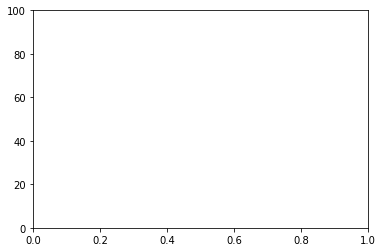

In [274]:
np.random.seed(0)
loss = Loss("mean_squared_error", sequential=True, verbose=False)
a = Input(input_shape=1, verbose=False)
b = LSTM(a, input_shape=1, output_shape=3, learning_rate=0.001, verbose=False)
c = Dense(b, input_shape=3, output_shape=1, learning_rate=0.001, sequential=True, verbose=False)
d = Output(c, loss_forward=loss.forward, loss_backward=loss.backward, output_shape=1, verbose=False)

e = Network(d, verbose=True)
e.fit(x, y, batch_size=1, epoch=1, random_state=0)
np.sum(mean_squared_error(e.predict(x), y))